In [10]:
import sonify
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from midiutil import MIDIFile

In [11]:
x = np.arange(10)
y = np.sin(x/(np.pi)) + (np.random.random(10)-0.5)

data = pd.DataFrame(data={'time':x, 'flux':y})

In [12]:
def sonification(data, inst):
    #sonify everything at once
    FEObj = pd.DataFrame()
    
    obj = data
    time = obj["mjd"]
    flux = obj["flux"]


    x_points = time 
    y_points = flux
    low_note=20
    high_note=100
    normalized_x = sonify.core.scale_list_to_range(x_points, new_min=0, new_max=4)
    
    normalized_y = sonify.core.scale_list_to_range(y_points, new_min=low_note, new_max=high_note)
            
    normed_data = list(zip(normalized_x, normalized_y))
    FEObj = obj
    
    trackwinst = []
    trackwinst.append([inst] + normed_data)
    sonify.play_midi_from_data(trackwinst, track_type='multiple', key='c_major')
    return FEObj

In [13]:

NN = 20
x = np.arange(NN)

d = {'mjd':[],'flux':[],'passband':[], 'fluxerr':[]}

for i in range(6):
    
    y = (5-i)**2*np.sin(x/(np.pi)) #+ (np.random.random(NN)-0.5)
    z = np.abs(np.random.random(NN)-0.5)*100
    
    if i==5:
        y[int(NN/2):int(NN/2) + 5] += 20
        
    else:
        pass
    
    for k in range(NN):

        d['mjd'].append(x[k])
        d['flux'].append(y[k])
        d['fluxerr'].append(z[k])
        d['passband'].append(i)

data = pd.DataFrame(data=d)
data

,mjd,flux,passband,fluxerr
0,0,0.000000,0,47.752021
1,1,7.824045,0,5.161221
2,2,14.862019,0,23.153342
3,3,20.406828,0,32.991963
4,4,23.901391,0,16.789222
5,5,24.994617,0,42.659828
6,6,23.576668,0,49.806244
7,7,19.790006,0,36.978465
8,8,14.015070,0,11.923547
9,9,6.832060,0,11.528820


In [14]:
#FEObj = sonification(data,'acoustic grand piano')     #sonify everything at once


In [15]:
#plt.scatter(FEObj['mjd'],FEObj['flux'], c='k',s=10)
#plt.plot(FEObj['mjd'],FEObj['flux'],'--')

In [16]:
ugrizyC = ["purple", "blue", "green", "lightgreen", "yellow", "red"]
def multiPlotObject(data, x0=None, x1=None, y0=None, y1=None):
    plt.figure(figsize=(10, 3))
    plt.xlabel("Time (MJD)")
    plt.ylabel("Flux")
    
    #objData = data["object_id"].isin([objectID])
    obj = data#[objData]
    
    for i in range(6):
        objPfilt = obj["passband"].isin([i])
        objP = obj[objPfilt]
        timeP = objP["mjd"]
        #print(timeP)
        fluxP = objP["flux"]
        plt.plot(timeP,fluxP, 'o', color = ugrizyC[i])

    if not (x0 is None) and not (x1 is None):
        plt.xlim(x0,x1)
    if not (y0 is None) and not (y1 is None):
        plt.ylim(y0,y1)
        
def multiPlotBand(timeP, fluxP, fluxerr=None, 
                  i=0, x0=None, x1=None, y0=None, y1=None):
    plt.xlabel("Time (MJD)")
    plt.ylabel("Flux")

    if fluxerr is None:
        plt.plot(timeP, fluxP, 'o', color = ugrizyC[i])
    else:
        plt.errorbar(timeP, fluxP, yerr=fluxerrP, fmt='o', color = ugrizyC[i])
  
    if not (x0 is None) and not (x1 is None):
        plt.xlim(x0,x1)
    if not (y0 is None) and not (y1 is None):
        plt.ylim(y0,y1)

In [17]:
def sonification(data, inst):
    
    FEObj = pd.DataFrame()
    
    obj = data
    time = obj["mjd"]
    flux = obj["flux"]

    print(time)
    x_points = time 
    #x_points[::2] *= 1.2
    y_points = flux
    low_note=20
    high_note=100
    normalized_x = sonify.core.scale_list_to_range(x_points, new_min=0, new_max=30)
    
    normalized_y = sonify.core.scale_list_to_range(y_points, new_min=low_note, new_max=high_note)
            
    normed_data = list(zip(normalized_x, normalized_y))
    FEObj = obj
    
    trackwinst = []
    trackwinst.append([inst] + normed_data)
    sonify.play_midi_from_data(trackwinst, track_type='multiple', key='c_major')
    return FEObj

def multiSonification(data):
    multiData = []

    FEObj = pd.DataFrame()
    
    number_of_octaves = []
    octave_start = []
    volume = []
    for i in range(6):
        objPfilt = data["passband"].isin([i])
        objP = data[objPfilt]
        timeP = objP["mjd"]
        #print(timeP)
        fluxP = objP["flux"]
        errP = objP["fluxerr"] * 100
        scaled_x = sonify.scale_list_to_range(timeP, new_min=0, new_max=10)
        #print(scaled_x)
        scaled_y = sonify.scale_list_to_range(fluxP, new_min=0, new_max=fluxP.max())
        
        scaled_errP = sonify.scale_list_to_range(errP, new_min=1, new_max=255)
        quantized_x = sonify.quantize_x_value(scaled_x, 0.01)
        #print(scaled_y)
        multiData.append(list(zip(quantized_x, scaled_y)))
        #print(multiData)
        volume.append(np.array(scaled_errP).astype(int))
        number_of_octaves.append(int(fluxP.max()/10)+1)
        octave_start.append(6-i)
        multiPlotBand(quantized_x, fluxP, i=i)
    plt.show()
    instruments_to_add = ['piccolo',
                          'violin',
                          'viola',
                          'cello',
                          'slap bass 1','tuba']
    
    multiDataWIntsruments = []
    for index, track in enumerate(multiData):
        multiDataWIntsruments.append([instruments_to_add[index]] + track)
    print(octave_start)
    print(number_of_octaves)
    #sonify.play_midi_from_data([multiDataWIntsruments[0]], track_type='multiple', key='c_major')
    #track_type='multiple', key='c_major')
    #FEObj = data
    sonify.play_midi_from_data(multiDataWIntsruments, track_type='multiple', 
                               key='c_minor', octave_start = octave_start,
                               number_of_octaves=number_of_octaves,
                               volume=volume)
    return(data)

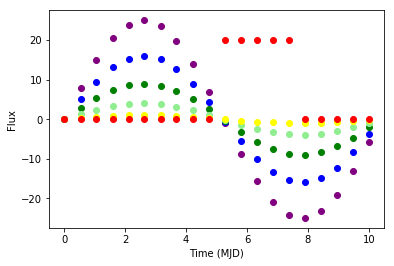

[6, 5, 4, 3, 2, 1]
[3, 2, 1, 1, 1, 3]
Done playing!


,mjd,flux,passband,fluxerr
0,0,0.000000,0,47.752021
1,1,7.824045,0,5.161221
2,2,14.862019,0,23.153342
3,3,20.406828,0,32.991963
4,4,23.901391,0,16.789222
5,5,24.994617,0,42.659828
6,6,23.576668,0,49.806244
7,7,19.790006,0,36.978465
8,8,14.015070,0,11.923547
9,9,6.832060,0,11.528820


In [18]:
multiSonification(data)

In [19]:
def multimonotoneSonification(data, inst, nbands):
    multiData = []

    FEObj = pd.DataFrame()
    
    number_of_octaves = []
    octave_start = []
    volume = []
    for i in range(6):
        objPfilt = data["passband"].isin([i])
        objP = data[objPfilt]
        timeP = objP["mjd"]
        #print(timeP)
        fluxP = objP["flux"]
        refluxP = np.zeros_like(objP["flux"]) + i * 10 + 1
        scaled_x = sonify.scale_list_to_range(timeP, new_min=0, new_max=10)
        #print(scaled_x)
        quantized_x = sonify.quantize_x_value(scaled_x, 0.01)
        #print(scaled_y)
        multiData.append(list(zip(quantized_x, refluxP)))
        #print(multiData)
        number_of_octaves.append(int(fluxP.max()/10)+1)
        octave_start.append(6-i)
        multiPlotBand(quantized_x, fluxP, i=i)
        
        #print(refluxP)
      
        volume.append(sonify.quantize_x_value(
            sonify.scale_list_to_range(fluxP, new_min=1, new_max=255), 1))
        #volume[-1] = sonify.scale_list_to_range(volume[-1], new_min=0, new_max=np.abs(volume[-1]).max())
        number_of_octaves.append(int(fluxP.max()/10)+1)
        octave_start.append(6-i)
        multiPlotBand(quantized_x, fluxP, i=i)
    plt.show()
    instruments_to_add = [inst] * 6
    
    multiDataWIntsruments = []
    for index, track in enumerate(multiData):
        multiDataWIntsruments.append([instruments_to_add[index]] + track)
    #print(octave_start)
    #print(number_of_octaves)
    #print(volume)
    #sonify.play_midi_from_data([multiDataWIntsruments[0]], track_type='multiple', key='c_major')
    #track_type='multiple', key='c_major')
    #FEObj = data
    sonify.play_midi_from_data(multiDataWIntsruments[:nbands], track_type='multiple', 
                               key='c_minor', octave_start = octave_start,
                               number_of_octaves=number_of_octaves,
                               volume=volume)
    return(data)



accordion


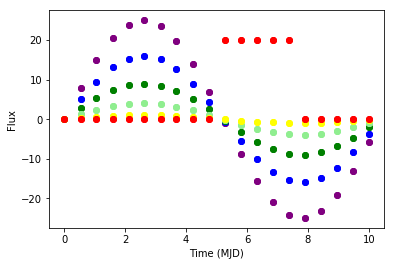

/Users/fbb/Dropbox/RubinRhapsodies/sonifyFED/sonify/core.py:107: RuntimeWarning: invalid value encountered in double_scalars
  return ((old_value - old_min)/(old_max - old_min)) * (new_max - new_min) + new_min


Done playing!


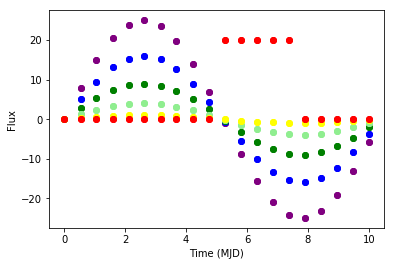

Done playing!
acoustic bass


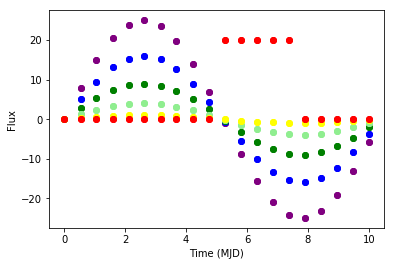

KeyboardInterrupt: 

In [20]:
for inst in sonify.constants.INSTRUMENTS.keys():
    print(inst)
    multimonotoneSonification(data, inst, 3)
    multimonotoneSonification(data, inst, 6)

In [ ]:
multiPlotObject(data)

# 